In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
a1 = 2
a2 = 1
rv1 = st.skewnorm.rvs(size=100000, a=a1)
rv2 = st.skewnorm.rvs(size=100000, a=a2)

In [6]:
rv1_t = st.norm.ppf(st.skewnorm(a=a1).cdf(rv1))
rv2_t = st.norm.ppf(st.skewnorm(a=a1).cdf(rv2))

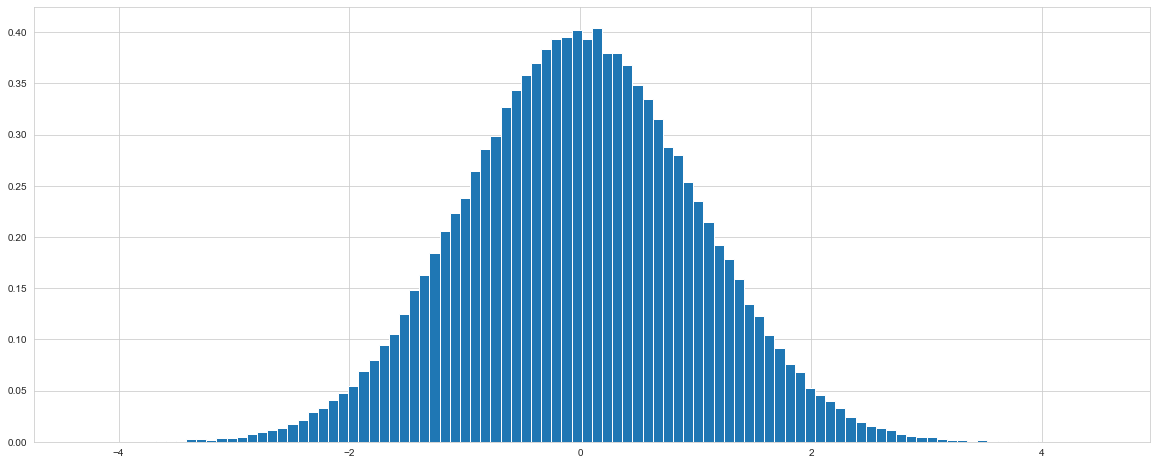

In [8]:
c = 1
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.hist(rv1_t, density=True, bins=100)
plt.show()

In [12]:
a3, loc, scale = st.skewnorm.fit(rv2_t)
print("skew: ", a3, "loc: ", loc, "scale: ", scale)

skew:  -1.7717918841460065 loc:  0.9507261602969652 scale:  1.7391826870431903


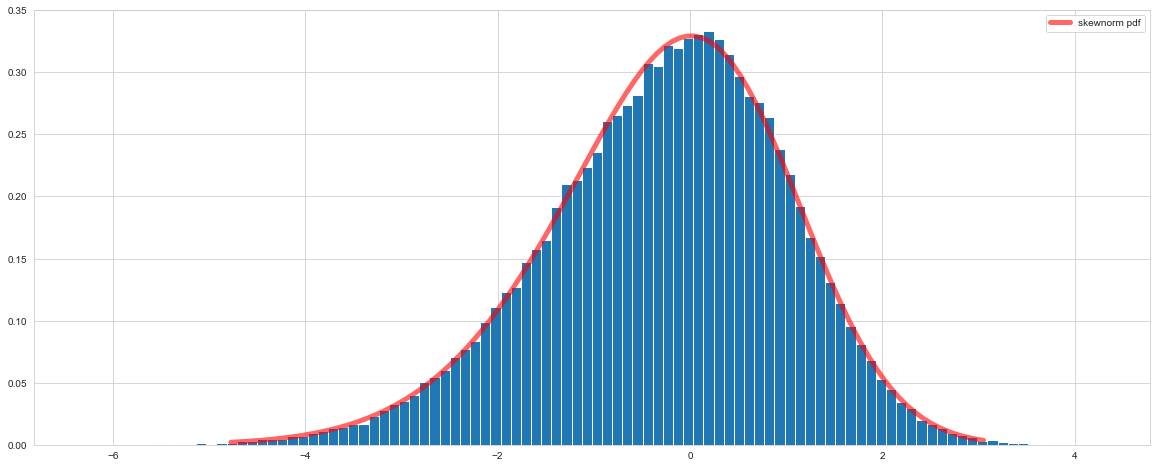

In [11]:
c = 1
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.hist(rv2_t, density=True, bins=100)
c= 1
x = np.linspace(st.skewnorm.ppf(0.001, a=a3, loc=loc, scale=scale),
                st.skewnorm.ppf(0.999, a=a3, loc=loc, scale=scale), 100)
ax.plot(x, st.skewnorm.pdf(x, a=a3, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')
ax.legend(loc="best", frameon=True)
plt.show()